In [1]:
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

from torchvision import transforms
import torchvision.datasets as datasets

from tqdm import tqdm

from modules import Trainer
from modules.models import LeNet_5, LeNet_5_filocl

## Load MNIST


In [2]:
# Load MNIST 
trainset = datasets.MNIST(
    root='./data',
    train=True,
    download=True, 
    transform=transforms.Compose([transforms.ToTensor(),transforms.Pad(2)])
)

testset = datasets.MNIST(
    root='./data',
    train=False,
    download=True,
    transform=transforms.Compose([transforms.ToTensor(),transforms.Pad(2)])
)

## Filter creation

In [60]:
def occlude_image(stripe_width, stripe_spacing, image):
    image=image.clone()
    i = torch.arange(len(image))
    j = i

    # This is an "external" sum (notice the transpositions)   
    diagonals = (i[:, None] - 1*j[None, :]).abs()

    period = stripe_width+stripe_spacing
    mask = (diagonals % period) < stripe_width

    image[mask] = 0

    return image

In [89]:
from matplotlib import rcParams
rcParams['text.usetex'] = False

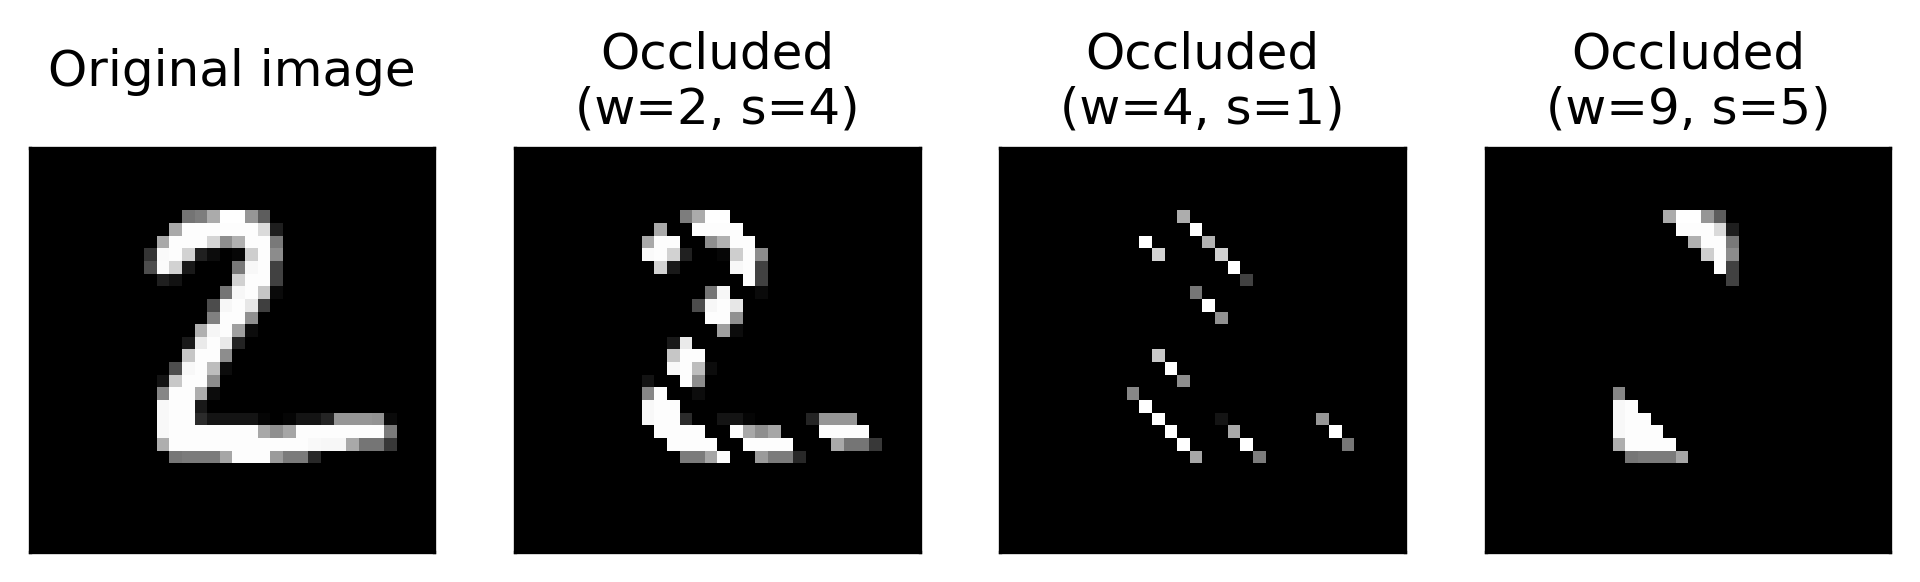

In [90]:
image = testset[1][0][0]

fig, axs = plt.subplots(1,4, figsize=(8,2), dpi=300)

ax = axs[0]
ax.imshow(
    image,
    cmap='gray'
)

ax.set_title('Original image', pad=15)

for ax, w, s in zip(
    axs[1:],
    [2,4,9],
    [4,1,5],
):
    ax.imshow(occlude_image(w, s, image), cmap='gray')
    ax.set_title(f'Occluded\n(w={w}, s={s})')

for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])